In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/home/nayak_pratheek17/Desktop/College Material/ML/MachineLearningLab/A2.csv')
df.head()


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [3]:
X = df.drop(['species'], axis = 1)

In [19]:
X


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [6]:
y = df['species']

In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

In [8]:
features = X_scaled.T

In [9]:
features

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [10]:
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [11]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]
vectors[:5]

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [13]:
values[:5]

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [14]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append((values[i] / np.sum(values)) * 100)
 
print("Variances for each feature:", explained_variances)

Variances for each feature: [72.9624454132999, 22.850761786701725, 3.668921889282867, 0.5178709107155016]


Text(0.5, 0, 'Dimensions')

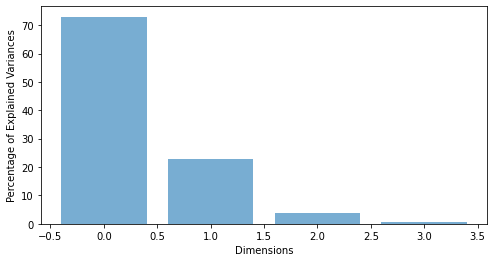

In [15]:
plt.figure(figsize = (8, 4))
plt.bar(range(4), explained_variances, alpha = 0.6)
plt.ylabel('Percentage of Explained Variances')
plt.xlabel('Dimensions')

In [17]:
projected1 = X_scaled.dot(vectors.T[0])
projected2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected1, columns = ['PC1'])
res['PC2'] = projected2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-2.264703,-0.480027,1
1,-2.080961,0.674134,1
2,-2.364229,0.341908,1
3,-2.299384,0.597395,1
4,-2.389842,-0.646835,1


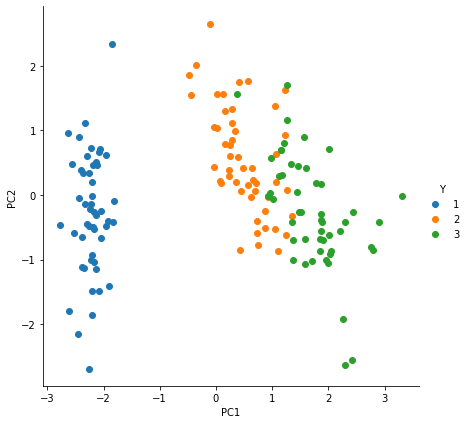

In [18]:
sns.FacetGrid(res, hue = "Y", height = 6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()